In [13]:
from keras.datasets import mnist 
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Activation
from matplotlib import pyplot as plt # import pyplot alias plt for plotting 
from sklearn.metrics import confusion_matrix 
import seaborn as sns

# Load datatset, preprocessing

In [14]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
input_dim = 784 #28*28 
X_train = X_train.reshape(60000, input_dim) 
X_test = X_test.reshape(10000, input_dim) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255 
X_test /= 255

In [16]:
output_dim = nb_classes = 10

In [17]:
Y_train = np_utils.to_categorical(y_train, nb_classes) 
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [20]:
Y_test.shape

(10000, 10)

# FFNN model in Keras


In [67]:
model = Sequential() 
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(output_dim,  activation='softmax')) 
batch_size = 128 
nb_epoch = 100

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [69]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,verbose=1, validation_data=(X_test, Y_test)) 
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

C:\Users\avadhut.c\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 46us/step - loss: 1.3824 - acc: 0.6483 - val_loss: 0.6848 - val_acc: 0.8410
Epoch 2/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.5522 - acc: 0.8580 - val_loss: 0.4347 - val_acc: 0.8830
Epoch 3/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.4151 - acc: 0.8860 - val_loss: 0.3642 - val_acc: 0.8975
Epoch 4/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.3628 - acc: 0.8979 - val_loss: 0.3295 - val_acc: 0.9052
Epoch 5/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.3325 - acc: 0.9061 - val_loss: 0.3069 - val_acc: 0.9115
Epoch 6/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.3114 - acc: 0.9114 - val_loss: 0.2891 - val_acc: 0.9181
Epoch 7/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.2947 - acc: 0.9159 - val_loss: 0.2751 - 

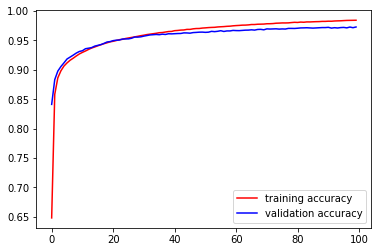

In [70]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

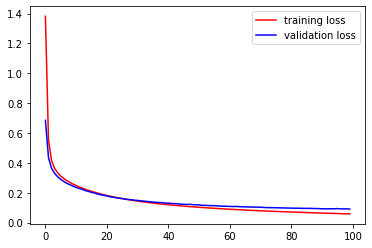

In [71]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

# Inference 

In [72]:
predictions = model.predict_classes(X_test)

In [73]:
predictions[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [74]:
np.argmax(Y_test[0])

7

In [75]:
y_test = np.argmax(Y_test, axis=1)

In [76]:
Y_test.shape

(10000, 10)

In [77]:
y_test.shape

(10000,)

# Misclassified Images

In [78]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

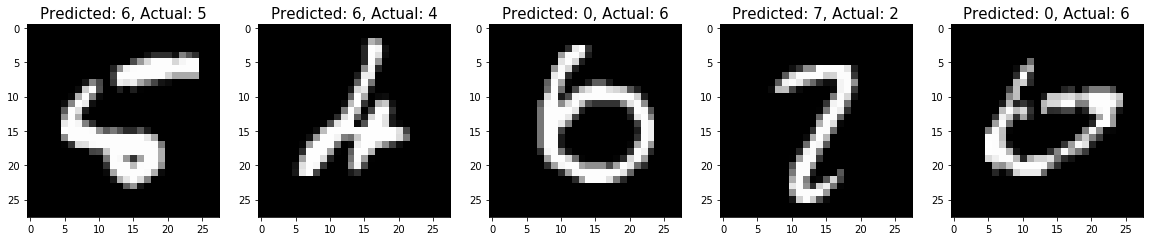

In [79]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

# Confusion Matrix

In [80]:
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


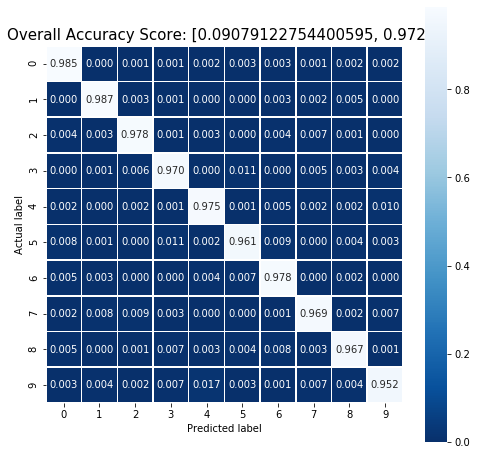

In [81]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();